In [1]:
%pip install openpyxl
%pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


### Загрузка данных в датафрейм   

In [3]:
df_samples = pd.read_excel('analyze.xlsx',parse_dates=['date_proc'])

Проверяем вывод

In [4]:
df_samples.head()

,date_proc,bias,r1,r2,r3,r4,"Рост*10-3, Па","Рнач*10-2, Па",Vbegin,"Ркон*10-2, Па",...,Tend,"Iн, А","Iв, А",Ibeg,Iend,Wfall_beg,Wref_beg,Wfall_end,Wref_end,proc_time
0,11.04.2024,300,46.000000,185.666667,781.666667,724.666667,2.5,2.5,8.33,2.5,...,13.2,5.6,5.6,151,141,16.00,0.46,15.60,0.39,30
1,11.04.2025,300,853.000000,1573.333333,1966.666667,1983.333333,2.0,2.5,8.32,2.5,...,12.4,5.6,5.6,142,135,15.85,0.39,14.97,0.12,30
2,12.04.2024,300,35266.666667,10600.000000,159600.000000,13533.333333,3.2,2.5,8.33,2.5,...,13.1,5.0,5.0,137,125,16.48,0.50,15.38,0.25,30
3,12.04.2025,300,7766.666667,5033.333333,32700.000000,NaN,2.0,2.5,8.32,2.5,...,12.3,5.0,5.0,140,126,17.48,0.71,16.11,0.33,30
4,15.04.2024,300,2280.000000,319.666667,586.000000,NaN,4.0,2.5,8.34,2.5,...,13.1,5.0,5.0,146,129,16.59,0.43,15.48,0.17,30


Формируем датафрейм, в котором для каждого значения сопротивления приведем основные параметры, при которых был получен образец, а также укажем положение подложки на подложкодержателе.

In [5]:
date_list=[]
resist_list = []
pressure_begin_list=[]
pressure_end_list=[]
temp_begin_list=[]
temp_end_list=[]
current_begin_list=[]
current_end_list=[]
wfall_begin_list=[]
wfall_end_list=[]
position_list=[]
for n in range(len(df_samples)):    
    for i in range(1,5):
        if ~np.isnan(df_samples.loc[n][f'r{i}']):
            date_list.append(df_samples.loc[n]['date_proc'])
            resist_list.append(df_samples.loc[n][f'r{i}'])
            pressure_begin_list.append(df_samples.loc[n]['Vbegin'])
            pressure_end_list.append(df_samples.loc[n]['Vend'])
            temp_begin_list.append(df_samples.loc[n]['Tbeg'])
            temp_end_list.append(df_samples.loc[n]['Tend'])
            current_begin_list.append(df_samples.loc[n]['Ibeg'])
            current_end_list.append(df_samples.loc[n]['Iend'])
            wfall_begin_list.append(df_samples.loc[n]['Wfall_beg'])
            wfall_end_list.append(df_samples.loc[n]['Wfall_end'])
            position_list.append(i)

            
            resist_df = pd.DataFrame(
                {'date_proc':date_list,
                'resist':resist_list,
                'pressure_begin':pressure_begin_list,
                 'pressure_end':pressure_end_list,
                 'temp_begin':temp_begin_list,
                 'temp_end':temp_end_list,
                 'current_begin':current_begin_list,
                 'current_end':current_end_list,
                 'wfall_begin':wfall_begin_list,
                 'wfall_end':wfall_end_list,
                 'position':position_list
                })
        

In [6]:
resist_df.head()

,date_proc,resist,pressure_begin,pressure_end,temp_begin,temp_end,current_begin,current_end,wfall_begin,wfall_end,position
0,11.04.2024,46.000000,8.33,8.31,12.6,13.2,151,141,16.00,15.60,1
1,11.04.2024,185.666667,8.33,8.31,12.6,13.2,151,141,16.00,15.60,2
2,11.04.2024,781.666667,8.33,8.31,12.6,13.2,151,141,16.00,15.60,3
3,11.04.2024,724.666667,8.33,8.31,12.6,13.2,151,141,16.00,15.60,4
4,11.04.2025,853.000000,8.32,8.31,12.5,12.4,142,135,15.85,14.97,1


Выведем и построим статистику по сопротивлениям образцов

In [7]:
resist_df.resist.describe()

count       115.000000
mean      11888.574783
std       33503.213140
min          10.000000
25%         555.666667
50%        1866.666667
75%        6566.666667
max      200000.000000
Name: resist, dtype: float64

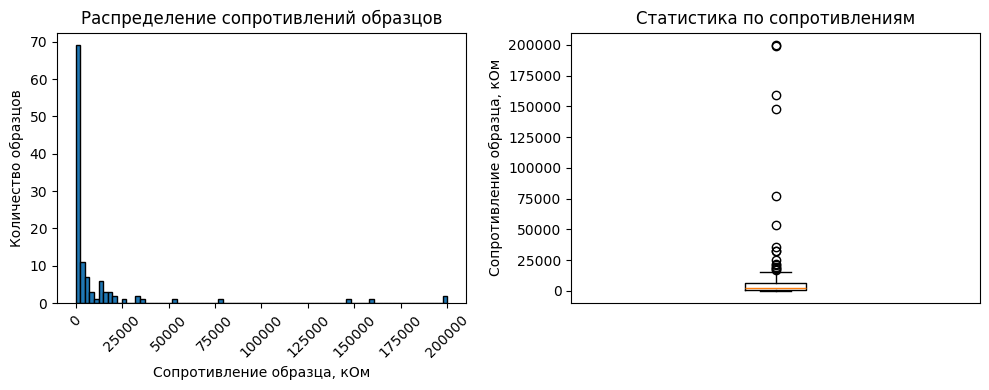

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 

axs[0].hist(data=resist_df,x= 'resist',  bins='auto',edgecolor='black')
axs[0].set_title('Распределение сопротивлений образцов')
axs[0].set_xlabel('Сопротивление образца, кОм')
axs[0].set_ylabel('Количество образцов')
axs[0].tick_params(axis='x', labelrotation=45)

axs[1].boxplot(x=resist_df.resist)
axs[1].set_title('Статистика по сопротивлениям')
axs[1].set_ylabel('Сопротивление образца, кОм')
axs[1].set_xticks([])

plt.tight_layout()
plt.show()

Видим, что распределение сопротивление имеет длинный хвост в области больших сопротивлений, а на ящике с усами это отражено в виде сильных выбросов.   
В реальности образцы, как с очень высокими, так и с очень низкими сопротивлениями не используются в работе. Поэтому следует произвести ограничить данные по величинам сопротивлений, ограничившись диапазоном сопротивлений, при которых наблюдается устойчивая эмиссионная способность образцов - от 60 кОм до 2500 кОм .

In [9]:
resist_df_clear = resist_df[(resist_df['resist']>=60) & (resist_df['resist']<=2500)]

Выведем и построим статистику для диапазона рабочих сопротивлений

In [10]:
resist_df_clear.resist.describe()

count      64.000000
mean      956.994792
std       731.209360
min        65.733333
25%       314.166667
50%       814.500000
75%      1404.666667
max      2446.666667
Name: resist, dtype: float64

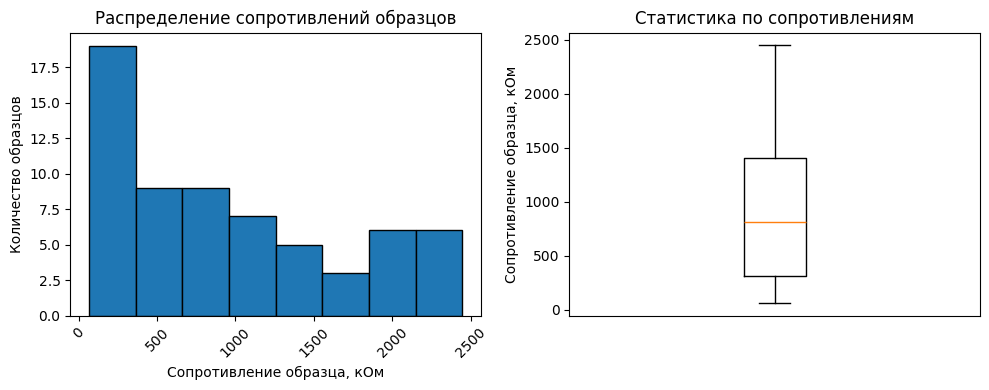

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 

axs[0].hist(data=resist_df_clear,x= 'resist',  bins='auto',edgecolor='black')
axs[0].set_title('Распределение сопротивлений образцов')
axs[0].set_xlabel('Сопротивление образца, кОм')
axs[0].set_ylabel('Количество образцов')
axs[0].tick_params(axis='x', labelrotation=45)

axs[1].boxplot(x=resist_df_clear.resist)
axs[1].set_title('Статистика по сопротивлениям')
axs[1].set_ylabel('Сопротивление образца, кОм')
axs[1].set_xticks([])

plt.tight_layout()
plt.show()

Видим, что "хвосты" пропали, а среднее и медиана стали довольно близки по значениям.   
В дальнейшем анализе для проведения А/А-теста будут использованы все значения, т.е. датафрейм resist_df, а для исследования корреляции и проведения кластеризации, будем использовать датафрейм resist_df_clear

### А/А-тест сопротивлений образцов

В виду того, что элементы технологической уствновки охлаждаются сетевой водой, которая имеют различную температуру в теплое и холодное время года, было замечено, что сопротивление образцов, полученных зимой и летом, различается. Встала задача определить является ли это различие статистически значимым.   
Так как в ходе проведения процессов не производилось целенаправленных изменений ключевых параметров, то в данном случае, мы имеем дело с А/А-тестом, в котором хотим проверить, что все изменения сопротивления не имеют статистически значимого характера.   
Н0: сопротивления образов не зависят от сезонности   
Н1: сезонность влияет на сопротивления образцов 

Добавим столбец с месяцем проведения процесса, чтобы потом отобрать интересующие нас месяца.

In [12]:
resist_df['month'] = pd.to_datetime(resist_df['date_proc'], format='%d.%m.%Y').dt.month

В виду того, что проведение процессов проходило неравномерно во времени, в отдельные датафреймы вошло различное количество месяцев, но это все равно не позволило получить одинаковые размеры выборок

In [13]:
resist_df_hot = resist_df[resist_df['month'].isin([5,6,7,8])]
resist_df_cold = resist_df[resist_df['month'].isin([10,11,12,1,2,3])]


In [14]:
print(f'выборка для теплого времени года {resist_df_hot.resist.count()} значения')
print(f'выборка для холодного времени года {resist_df_cold.resist.count()} значений')

выборка для теплого времени года 54 значения
выборка для холодного времени года 37 значений


Выделим значения сопротивлений в отдельные датафреймы, а точнее в серии

In [15]:
data1 = resist_df_hot.resist
data2 = resist_df_cold.resist

Посмотрим статистику, а также визуализируем с помощью гистограмм распределения данных в этих сериях

In [16]:
print('Статистика для образцов, полученых в теплое время года')
print(data1.describe())
print('Статистика для образцов, полученых в холодное время года')
print(data2.describe())

Статистика для образцов, полученых в теплое время года
count        54.000000
mean      10448.903086
std       33862.294357
min          10.000000
25%         302.750000
50%        1182.000000
75%        4108.333333
max      200000.000000
Name: resist, dtype: float64
Статистика для образцов, полученых в холодное время года
count        37.000000
mean      13654.000000
std       34262.140443
min          53.000000
25%         866.666667
50%        3433.333333
75%       14166.666667
max      199000.000000
Name: resist, dtype: float64


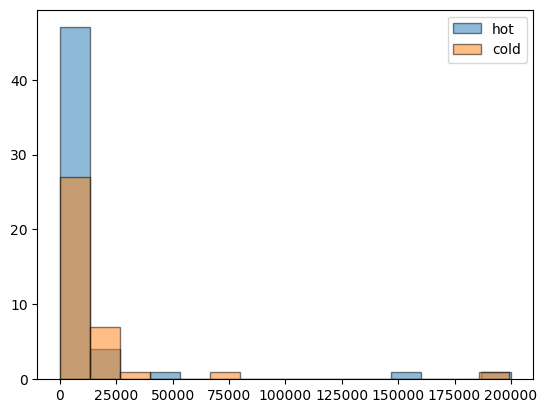

In [17]:
plt.hist(data1, alpha=0.5, edgecolor='black', bins=15, label='hot')
plt.hist(data2, alpha=0.5, edgecolor='black', bins=15, label='cold')
plt.legend()
plt.show()

Хотя и так видно, что данные не имеют нормального распределения, проведем тест Шапиро-Уилка на нормальность данных   
Н0: данные распределены нормально   
Н1: распределение данных не носит нормального характера  
уровень стат значимости установим на уровне 0,05

In [18]:
# Нормальность (тест Шапиро-Уилка)
shapiro_test1 = stats.shapiro(data1)
shapiro_test2 = stats.shapiro(data2)
print(f"Тест Шапиро-Уилка для группы 1: W={shapiro_test1.statistic:.4f}, p={shapiro_test1.pvalue:.4f}")
print(f"Тест Шапиро-Уилка для группы 2: W={shapiro_test2.statistic:.4f}, p={shapiro_test2.pvalue:.4f}")


Тест Шапиро-Уилка для группы 1: W=0.3210, p=0.0000
Тест Шапиро-Уилка для группы 2: W=0.3936, p=0.0000


Видим, что в обеих выборках p-value меньше 0,05 - отвергаем нулевую гипотезу. Это значит, что обе выборки не имеют нормального распределения (получены из ГС, данные в которой распределены не нормально)

Проверим обе выборки на равенство дисперсий с помощью теста Левена   
Н0: дисперсии обеих выборок равны   
Н1: дисперсии выборок не равны   
уровень стат значимости установим 0,05

In [19]:
# Равенство дисперсий (тест Левена)
levene_test = stats.levene(data1, data2)
print(f"Тест Левена: W={levene_test.statistic:.4f}, p={levene_test.pvalue:.4f}")

Тест Левена: W=0.1369, p=0.7122


Согласно результата, полученного при проведении теста Левена, p-value больше 0,05 - нет достаточных оснований полагать, что дисперсии отличаются

Проведем общий выбор теста для проведения А/А-эксперимента

In [20]:
alpha = 0.05 # Уровень значимости

# Проверяем предположения
normal1 = shapiro_test1.pvalue > alpha
normal2 = shapiro_test2.pvalue > alpha
equal_var = levene_test.pvalue > alpha

if normal1 and normal2 and equal_var:
    print("\nПредположения для t-теста Стьюдента выполняются.")
    ttest_result = stats.ttest_ind(data1, data2, equal_var=True)
    print(f"Независимый t-тест Стьюдента: statistic={ttest_result.statistic:.4f}, pvalue={ttest_result.pvalue:.4f}")
    if ttest_result.pvalue < alpha:
        print("Различия статистически значимы (p < 0.05).")
    else:
        print("Различия не являются статистически значимыми (p >= 0.05).")

elif normal1 and normal2 and not equal_var:
    print("\nПредположение о равенстве дисперсий нарушено, но нормальность выполняется. Используем t-тест Уэлча.")
    ttest_welch_result = stats.ttest_ind(data1, data2, equal_var=False)
    print(f"t-тест Уэлча: statistic={ttest_welch_result.statistic:.4f}, pvalue={ttest_welch_result.pvalue:.4f}")
    if ttest_welch_result.pvalue < alpha:
        print("Различия статистически значимы (p < 0.05).")
    else:
        print("Различия не являются статистически значимыми (p >= 0.05).")

else:
    print("\nПредположение о нормальности нарушено. Используем U-критерий Манна-Уитни.")
    mannwhitney_result = stats.mannwhitneyu(data1, data2, alternative='two-sided') # 'two-sided' для двустороннего теста
    print(f"U-критерий Манна-Уитни: statistic={mannwhitney_result.statistic:.4f}, pvalue={mannwhitney_result.pvalue:.4f}")
    if mannwhitney_result.pvalue < alpha:
        print("Различия статистически значимы (p < 0.05).")
    else:
        print("Различия не являются статистически значимыми (p >= 0.05).")



Предположение о нормальности нарушено. Используем U-критерий Манна-Уитни.
U-критерий Манна-Уитни: statistic=754.0000, pvalue=0.0482
Различия статистически значимы (p < 0.05).


U-критерий Манна-Уитни говорит о том, что имеется статистическая значимость в различиях сопротивлений, полученных в разное время года, но величина p-value имеет пограничный характер.   
Вместе с тем, величина медианы второй группы (3433) почти в 3 раза превышает медиану первой группы (1182), что говорит о довольно сильном размере эффекта. Несмотря на это проведем дополнительную проверку с помощью bootstrap, и построим доверительный интервал разницы средних.

95% доверительный интервал для разницы средних (группа2 - группа1): [-10317.27478353  18141.70271522]
Различия не являются статистически значимыми (0 попадает в доверительный интервал).


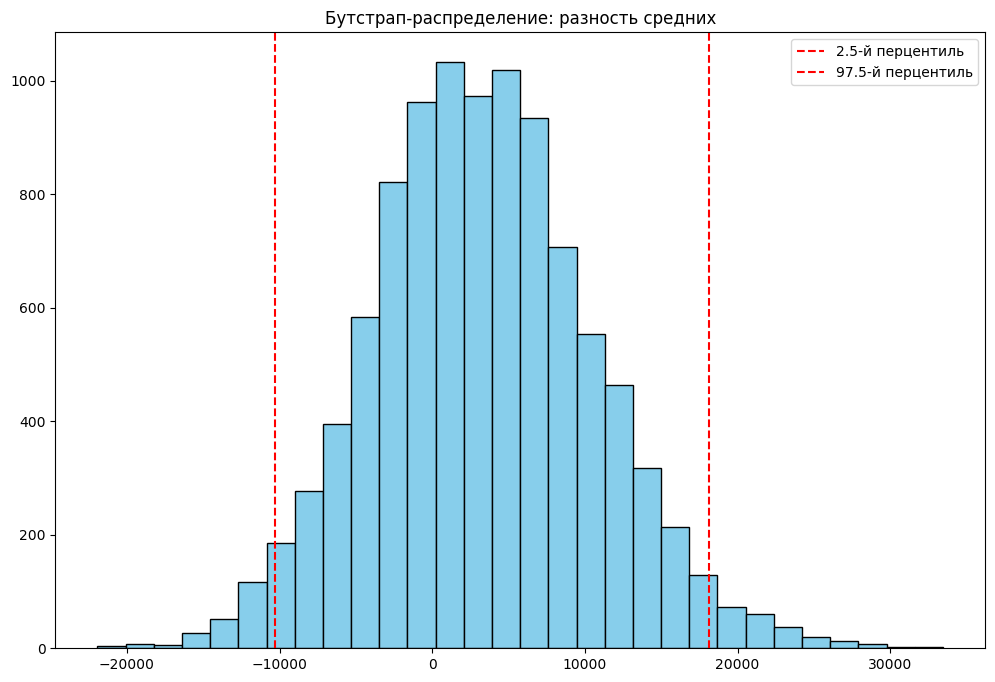

In [21]:
# Фиксируем сид для воспроизводимости
np.random.seed(42)

n_bootstrap_samples = 10000
n1 = len(data1)
n2 = len(data2)

bootstrap_diffs = []
for _ in range(n_bootstrap_samples):
    # Ресэмплирование с замещением
    sample1 = np.random.choice(data1, size=n1, replace=True)
    sample2 = np.random.choice(data2, size=n2, replace=True)

    mean_diff = np.mean(sample2) - np.mean(sample1)
    bootstrap_diffs.append(mean_diff)

# Построение доверительного интервала для разницы средних
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])
print(f"95% доверительный интервал для разницы средних (группа2 - группа1): {confidence_interval}")

if confidence_interval[0] > 0 or confidence_interval[1] < 0:
    print("Различия статистически значимы (0 не попадает в доверительный интервал).")
else:
    print("Различия не являются статистически значимыми (0 попадает в доверительный интервал).")

# Визуализация bootstrap
plt.figure(figsize=(12, 8))

plt.hist(bootstrap_diffs, bins=30, color='skyblue', edgecolor='black')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='2.5-й перцентиль')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='97.5-й перцентиль')
plt.title("Бутстрап-распределение: разность средних")
plt.legend()
plt.show()    

Высокая вариабельность данных и наличие выбросов,  делают оценку разницы средних ненадежной. Проведем те же самые оценки для медиан. 

95% доверительный интервал для разницы медиан (группа2 - группа1): [-447.06666667 7773.33333333]
Различия не являются статистически значимыми (0 попадает в доверительный интервал).


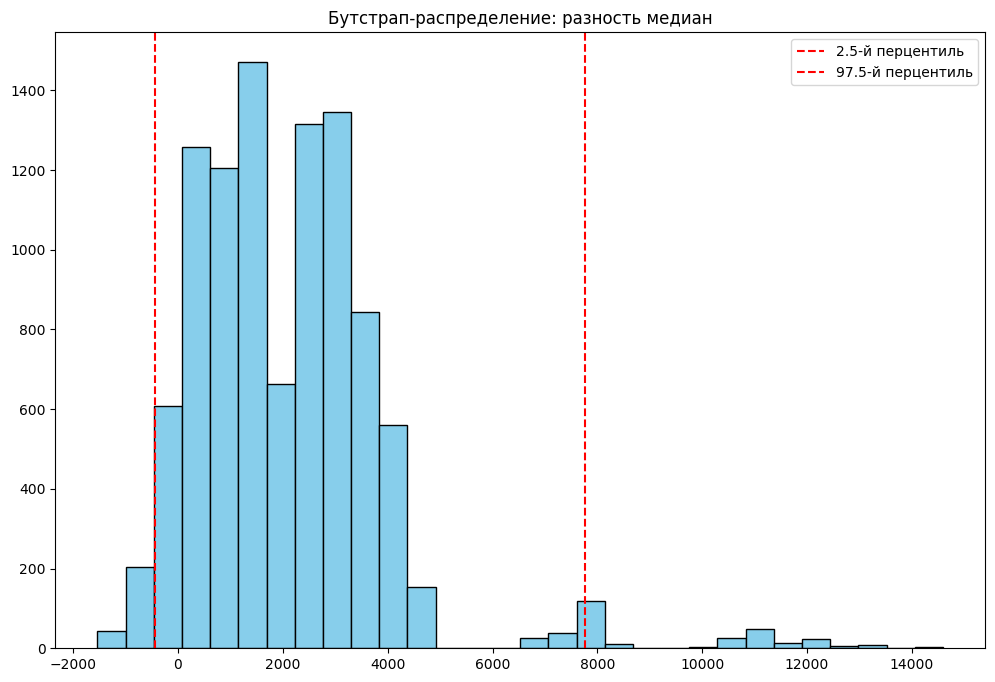

In [22]:
# Фиксируем сид для воспроизводимости
np.random.seed(54)

n_bootstrap_samples = 10000
n1 = len(data1)
n2 = len(data2)

bootstrap_diffs = []
for _ in range(n_bootstrap_samples):
    # Ресэмплирование с замещением
    sample1 = np.random.choice(data1, size=n1, replace=True)
    sample2 = np.random.choice(data2, size=n2, replace=True)

    median_diff = np.median(sample2) - np.median(sample1)
    bootstrap_diffs.append(median_diff)

# Построение доверительного интервала для медиан
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])
print(f"95% доверительный интервал для разницы медиан (группа2 - группа1): {confidence_interval}")

if confidence_interval[0] > 0 or confidence_interval[1] < 0:
    print("Различия статистически значимы (0 не попадает в доверительный интервал).")
else:
    print("Различия не являются статистически значимыми (0 попадает в доверительный интервал).")

# Визуализация bootstrap
plt.figure(figsize=(12, 8))

plt.hist(bootstrap_diffs, bins=30, color='skyblue', edgecolor='black')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='2.5-й перцентиль')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='97.5-й перцентиль')
plt.title("Бутстрап-распределение: разность медиан")
plt.legend()
plt.show()    

**Общий вывод**   
Несмотря на то, что точечные оценки медиан существенно различались (1182 в группе 1 против 3433 в группе 2), разброс данных в группах был настолько велик, что ни разница средних (95% ДИ: [-10317, 18141]), ни разница медиан (95% ДИ: [-447, 7773]) не достигли статистической значимости на уровне 0.05. Критерий Манна-Уитни также показал лишь пограничную значимость (p = 0.048). Полученные данные не предоставляют убедительных доказательств систематического различия между группами.   
Для получения более надежных результатов стоит:   
- увеличить выборку, добавляя новые данные по мере их получения - это должно сузить доверительные интервалы
- возможно, стоит разделить группы образцов на подгруппы или вовсе убрать из рассмотрения "хвосты" из больших значений сопротивлений, которые не представляют практической пользы

### Анализ корреляций   
Для понимания того, что в наибольшей степени влияет на сопротивление получаемых пленок, построим матрицы корреляций.   
Для проведения анализа будет использовать датафрейм с величинами сопротивлений, которые представляют практический интерес.

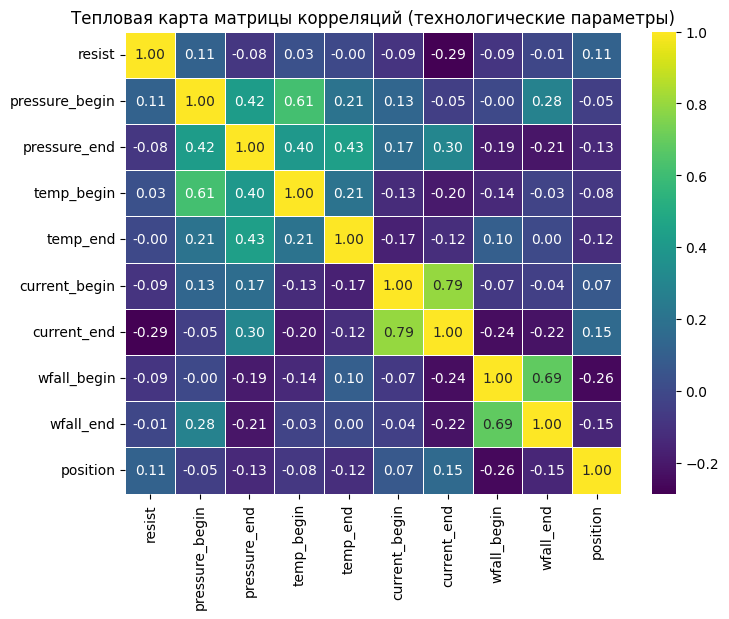

In [23]:
# Выбираем несколько столбцов из датафрейма
corr_columns = [
    'resist',
    'pressure_begin',
    'pressure_end',
    'temp_begin',
    'temp_end',
    'current_begin',
    'current_end',
    'wfall_begin',
    'wfall_end',
    'position'
]

# Считаем матрицу корреляций
corr_matrix = resist_df_clear[corr_columns].corr()

# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций (технологические параметры)')
plt.show()

В первую очередь нас интересует с какими технологическими параметрами коррелирует сопротивление пленок.  
Выделим основные значения:   
- позиция подложки на подложкодержателе (0,11)
- ток плазмы в конце процесса (-0,29)
- начальное давление плазмообразущего газа (0,11)

Если смотреть по другим параметрам, то вполне логично, что начальные и конечные значения сильно скорреллировны друг с другом (например, ток начальный и ток конечный - 0,79, падающая мощность начальная и конечная - 0,69)   

Логично, что ток плазмы имеет корреляцию с давлением плазмообразующего газа (эту закономерность мы наблюдали в явном виде), а вот корреляция между давлением и температурой подложки, скорее всего, имеет случайный характер.  

Построим матрицу корреляций для изменения параметров

In [24]:
resist_df_clear = resist_df_clear.copy()
resist_df_clear['delta_pressure'] = abs(resist_df_clear['pressure_end']-resist_df_clear['pressure_begin'])
resist_df_clear['delta_temp'] = abs(resist_df_clear['temp_end']-resist_df_clear['temp_begin'])
resist_df_clear['delta_current'] = abs(resist_df_clear['current_end']-resist_df_clear['current_begin'])
resist_df_clear['delta_wfall'] = abs(resist_df_clear['wfall_end']-resist_df_clear['wfall_begin'])

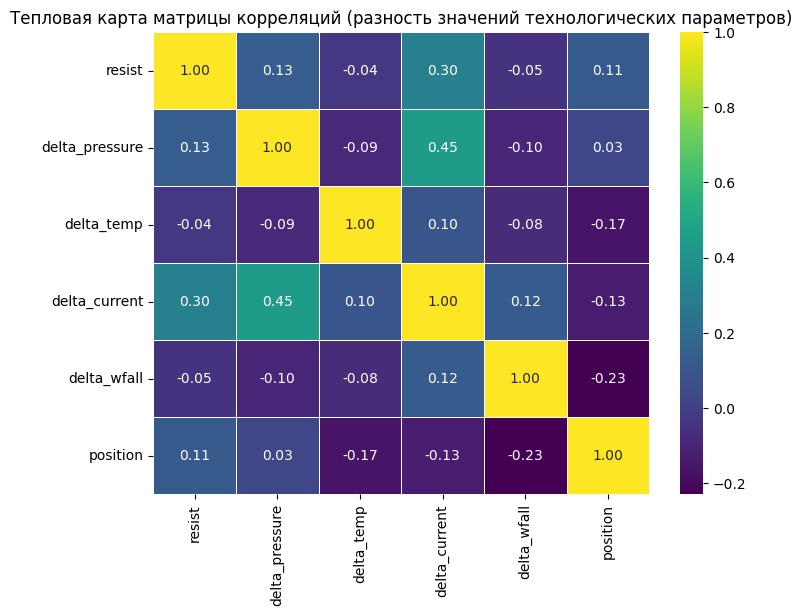

In [25]:
# Выбираем несколько столбцов из датафрейма
corr_columns = [
    'resist',
    'delta_pressure',
    'delta_temp',
    'delta_current',
    'delta_wfall',
    'position'
]

# Считаем матрицу корреляций
corr_matrix = resist_df_clear[corr_columns].corr()

# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций (разность значений технологических параметров)')
plt.show()

Видим, что корреляции сохранились. Тем не менее, рассчитаем относительные значения параметров.

In [26]:
resist_df_clear['arb_pressure'] = abs(resist_df_clear['pressure_end']-resist_df_clear['pressure_begin'])/resist_df_clear['pressure_begin']
resist_df_clear['arb_temp'] = abs(resist_df_clear['temp_end']-resist_df_clear['temp_begin'])/resist_df_clear['temp_begin']
resist_df_clear['arb_current'] = abs(resist_df_clear['current_end']-resist_df_clear['current_begin'])/resist_df_clear['current_begin']
resist_df_clear['arb_wfall'] = abs(resist_df_clear['wfall_end']-resist_df_clear['wfall_begin'])/resist_df_clear['wfall_begin']

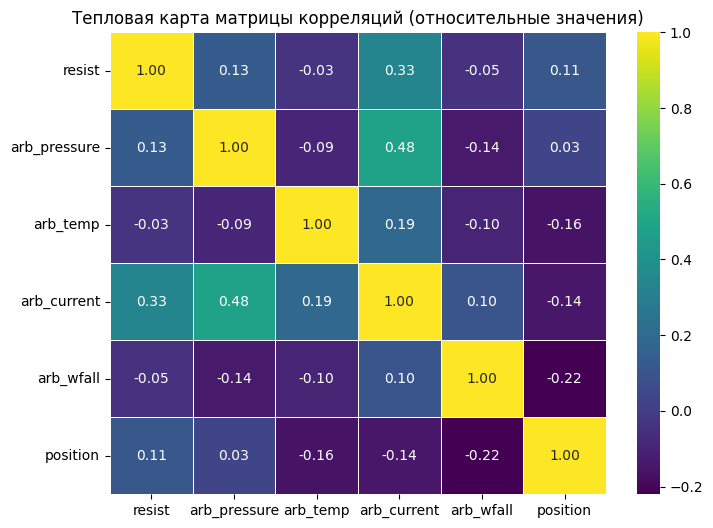

In [27]:
# Выбираем несколько столбцов из датафрейма
corr_columns = [
    'resist',
    'arb_pressure',
    'arb_temp',
    'arb_current',
    'arb_wfall',
    'position'
]

# Считаем матрицу корреляций
corr_matrix = resist_df_clear[corr_columns].corr()

# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций (относительные значения)')
plt.show()

Принципиальных отличий нет. Делаем вывод, что на сопротивление получаемых пленок сильнее всего влияет ток плазмы, который зависит от давления.

In [28]:
'''
resist_df_param['resist'] = resist_df_arb['resist']
resist_df_param['press+temp']=resist_df_arb['arb_pressure']+resist_df_arb['arb_temp']#+df_samples['current']+df_samples['wfall']+df_samples['wref']
resist_df_param['press+temp+curr']=resist_df_arb['arb_pressure']+resist_df_arb['arb_temp']+resist_df_arb['arb_current']#+df_samples['wfall']+df_samples['wref']
resist_df_param['press+temp+curr+wfall']=resist_df_arb['arb_pressure']+resist_df_arb['arb_temp']+resist_df_arb['arb_current']+resist_df_arb['arb_wfall']
resist_df_param['press+curr']=resist_df_arb['arb_pressure']+resist_df_arb['arb_current']
'''

"\nresist_df_param['resist'] = resist_df_arb['resist']\nresist_df_param['press+temp']=resist_df_arb['arb_pressure']+resist_df_arb['arb_temp']#+df_samples['current']+df_samples['wfall']+df_samples['wref']\nresist_df_param['press+temp+curr']=resist_df_arb['arb_pressure']+resist_df_arb['arb_temp']+resist_df_arb['arb_current']#+df_samples['wfall']+df_samples['wref']\nresist_df_param['press+temp+curr+wfall']=resist_df_arb['arb_pressure']+resist_df_arb['arb_temp']+resist_df_arb['arb_current']+resist_df_arb['arb_wfall']\nresist_df_param['press+curr']=resist_df_arb['arb_pressure']+resist_df_arb['arb_current']\n"

In [29]:
'''
# Выбираем несколько столбцов из датафрейма
corr_columns = [
    'resist',
    'press+temp',
    'press+temp+curr',
    'press+temp+curr+wfall',
    'press+curr'
]

# Считаем матрицу корреляций
corr_matrix = resist_df_param[corr_columns].corr()

# Задаём размер графика
plt.figure(figsize=(8, 6))

# Создаём визуализацию
sns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций')
plt.show()
'''

"\n# Выбираем несколько столбцов из датафрейма\ncorr_columns = [\n    'resist',\n    'press+temp',\n    'press+temp+curr',\n    'press+temp+curr+wfall',\n    'press+curr'\n]\n\n# Считаем матрицу корреляций\ncorr_matrix = resist_df_param[corr_columns].corr()\n\n# Задаём размер графика\nplt.figure(figsize=(8, 6))\n\n# Создаём визуализацию\nsns.heatmap(data=corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')\n\n# Показываем график с заголовком\nplt.title('Тепловая карта матрицы корреляций')\nplt.show()\n"

Установлена корреляция сопротивления образцов (в порядке убывания) с током, давлением, позицией.   
Вместе с этим, имеет место корреляция тока и давления.

### Кластеризация образцов   
Рабочие образцы важно разделить на группы по величинам сопротивлений, чтобы в дальнейшем можно было оперировать группами образцов из одного диапазона сопротивлений.

In [31]:
# создадим д/ф с данными для кластеризации
resist_df_clear_clust = resist_df_clear[['resist',                                         			
    'arb_pressure',
    'arb_temp',
    'arb_current',
    'arb_wfall',
    'position']]


Определим оптимальное число кластеров

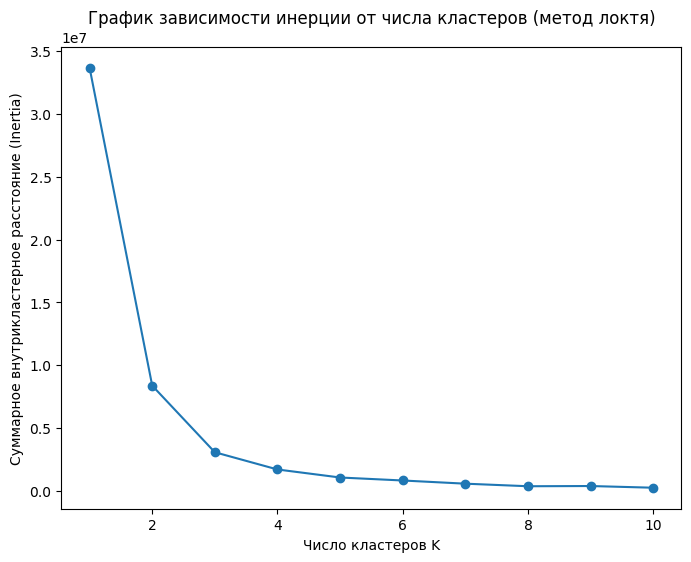

In [45]:
# Создаём массив, в котором будем хранить значения inertia для разбиения с разным числом кластеров
i = []

# Задаём диапазон количества кластеров
min_k = 1
max_k = 10

plt.figure(figsize=(8, 6))

# Перебираем разное количество кластеров
for k in range(min_k, max_k + 1):
   km = KMeans(n_clusters=k)  # Создаём модель KMeans для текущего значения k
   km.fit_transform(resist_df_clear_clust)  # Обучаем модель и получаем координаты точек в пространстве кластеров
   i.append(km.inertia_)  # Сохраняем значение инерции для текущего k

# Строим график зависимости инерции от количества кластеров
plt.plot(range(min_k, max_k + 1), i, marker='o')
plt.xlabel('Число кластеров K')  # Подпись оси X
plt.ylabel('Суммарное внутрикластерное расстояние (Inertia)')  # Подпись оси Y
plt.title('График зависимости инерции от числа кластеров (метод локтя)')  # Заголовок
plt.show()

По перегибу графика можно установить, что оптимальное число кластеров составляет 3.   
Произведем для этого числа кластеров разделение сопротивлений на кластеры по каждому параметру. 

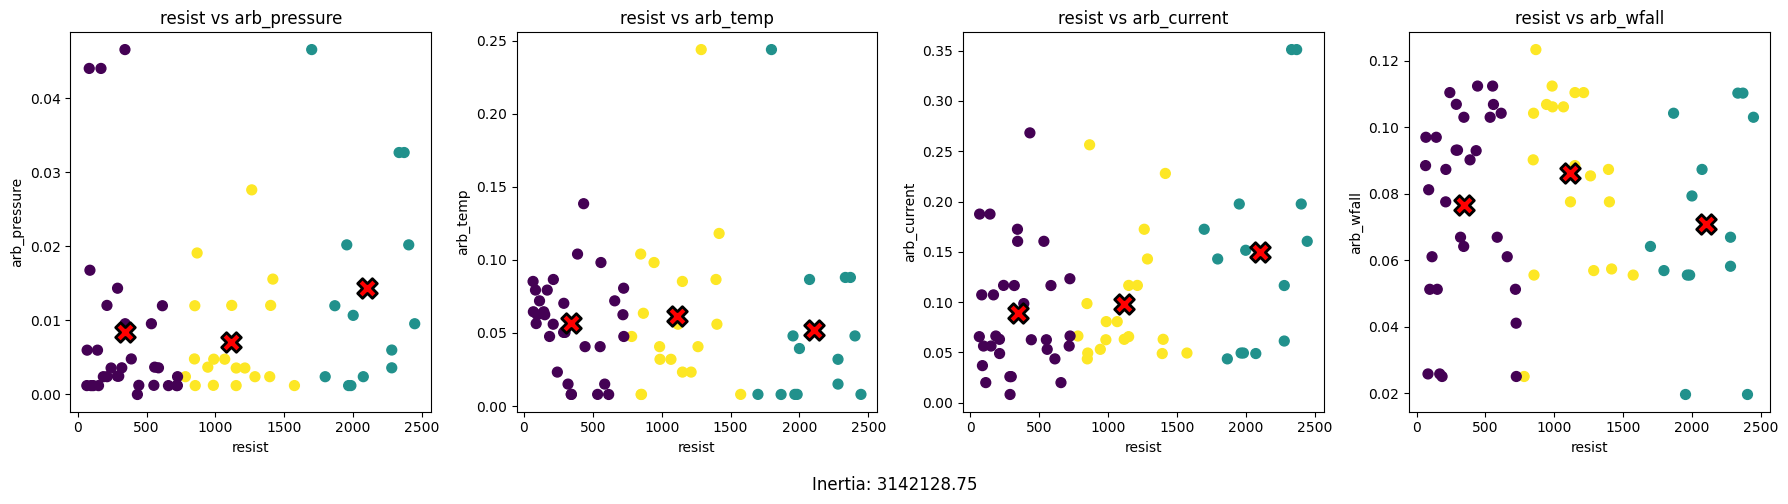

In [47]:
kmeans = KMeans(n_clusters=3)

labels = kmeans.fit_predict(resist_df_clear_clust)

# Получаем координаты центров (центроидов) кластеров
centroids = kmeans.cluster_centers_
# Создаём 3 графика (1 строка × 3 столбца) для отображения попарных комбинаций признаков
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Список названий признаков, которые будут использоваться на графиках
axs = ['resist',
    'arb_pressure',
    'arb_temp',
    'arb_current',
    'arb_wfall']

# Перебираем пары признаков: (Speed vs Duration), (Speed vs Volume), (Duration vs Volume)
for i, (x_idx, y_idx) in enumerate([[0, 1], [0, 2], [0, 3], [0, 4]]):
   x_label, y_label = axs[x_idx], axs[y_idx]  # Названия признаков для осей

   # Строим точки — объекты из датафрейма, раскрашенные по меткам кластера
   axes[i].scatter(
       resist_df_clear_clust[x_label],  # Значения по оси X
       resist_df_clear_clust[y_label],  # Значения по оси Y
       c=labels,  # Цвет зависит от номера кластера
       cmap='viridis',  # Цветовая карта
       s=50  # Размер точек
   )

   # Строим центроиды кластеров красными крестами
   axes[i].scatter(
       centroids[:, x_idx],  # X-координаты центров
       centroids[:, y_idx],  # Y-координаты центров
       s=200,  # Размер крестов
       c='red',  # Цвет — красный
       edgecolors='black',  # Обводка — чёрная
       linewidths=2,  # Толщина обводки
       marker='X'  # Форма маркера — крест
   )

   # Подписи осей и заголовок графика
   axes[i].set_xlabel(x_label)
   axes[i].set_ylabel(y_label)
   axes[i].set_title(f'{x_label} vs {y_label}')

# Подгоняем макет, оставляя место снизу для подписи с инерцией
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Добавляем текст с СВР внизу графика (по центру)
fig.text(0.5, 0.01, f'Inertia: {kmeans.inertia_:.2f}', ha='center', fontsize=12)

# Показываем итоговый набор визуализаций
plt.show()

В ходе кластеризации образцы были поделены на три группы, для практических целей лучше разделить образцы не более число кластеров.

**Общие выводы**  
1. на данный момент нельзя с уверенностью сказать, что сопротивления образцов подвержены сезонности
2. установлено, что сопротивление образцов коррелирует с током плазмы, давлением плазмообразующего газа и положением образца на подложкодержателе
3. в ходе кластеризации образцы были разбиты на три группы по велечинам сопротивлений
